<a href="https://colab.research.google.com/github/SuperDuck1892/A.I_HomeWork/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from keras.datasets import fashion_mnist
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()
print(x_train.shape)
print(y_train.shape)
     

(60000, 28, 28)
(60000,)


In [2]:
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


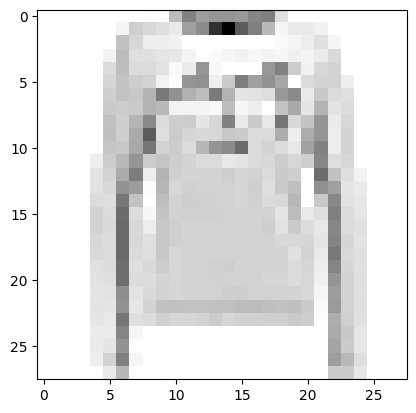

so hinh la: 2


In [3]:
digit=x_train[1892]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()
print('so hinh la:',y_train[1892])

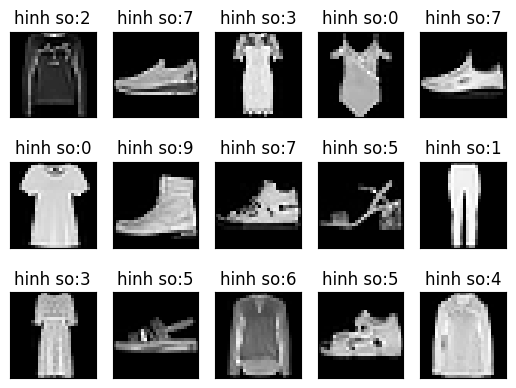

In [4]:
for i in range(15):
   plt.subplot(3,5,i+1)
   plt.tight_layout
   plt.imshow(x_train[i+1892],cmap='gray',interpolation='none')
   plt.title( 'hinh so:{}'.format(y_train[i+1892]))
   plt.xticks([])
   plt.yticks([])

In [5]:
from keras.models import Sequential #Senquential  mo ta ANN theo tuan tu cac lop #ke tiep lien tuc nhau
from keras.layers import Dense      #Dense=full_connected( su ket noi daydu)  
model = Sequential()    
model.add(Dense(512,activation='relu',input_shape=(28*28,)))
model.add(Dense(512, activation= 'relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [6]:
x_train = x_train.reshape((60000,28*28))  #chỉnh lại kích thước số dữ liệu đầu vào 
x_train = x_train.astype('float32')/255   #chuyển qua float để có thể chia được (dữ liệu từ 0->1)

x_test = x_test.reshape((10000,28*28))  
x_test = x_test.astype('float32')/255

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [7]:

from keras.utils import to_categorical    #to_categorical: chuyển từ 1 bit thành nhiều bit đầu ra 
y_train = to_categorical(y_train,10)  #từ 1 bit thành 10 bit
y_test = to_categorical(y_test,10)

print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [8]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',  #Đánh giá sự mất mát (loss)
              metrics=['accuracy']) #Đo lường độ chính xác (metrics)
model.fit(x_train,y_train,epochs=10,batch_size=128)   #10 lần học, mỗi lần học 128 lần ngẫu nhiên
test_loss, test_acc = model.evaluate(x_test,y_test)
print('Độ mất mát: ',test_loss)
print('Độ chính xác: ',test_acc)

Epoch 1/10
469/469 [==============================] - 10s 20ms/step - loss: 0.5436 - accuracy: 0.7997
Epoch 2/10
469/469 [==============================] - 9s 19ms/step - loss: 0.3740 - accuracy: 0.8624
Epoch 3/10
469/469 [==============================] - 6s 13ms/step - loss: 0.3312 - accuracy: 0.8765
Epoch 4/10
469/469 [==============================] - 5s 12ms/step - loss: 0.3025 - accuracy: 0.8873
Epoch 5/10
469/469 [==============================] - 6s 13ms/step - loss: 0.2840 - accuracy: 0.8938
Epoch 6/10
469/469 [==============================] - 5s 12ms/step - loss: 0.2704 - accuracy: 0.8982
Epoch 7/10
469/469 [==============================] - 6s 13ms/step - loss: 0.2550 - accuracy: 0.9044
Epoch 8/10
469/469 [==============================] - 6s 12ms/step - loss: 0.2436 - accuracy: 0.9081
Epoch 9/10
469/469 [==============================] - 6s 13ms/step - loss: 0.2355 - accuracy: 0.9126
Epoch 10/10
313/313 [==============================] - 1s 4ms/step - loss: 0.3398 - accura

In [9]:
model.save('fashion_mnist.h5')

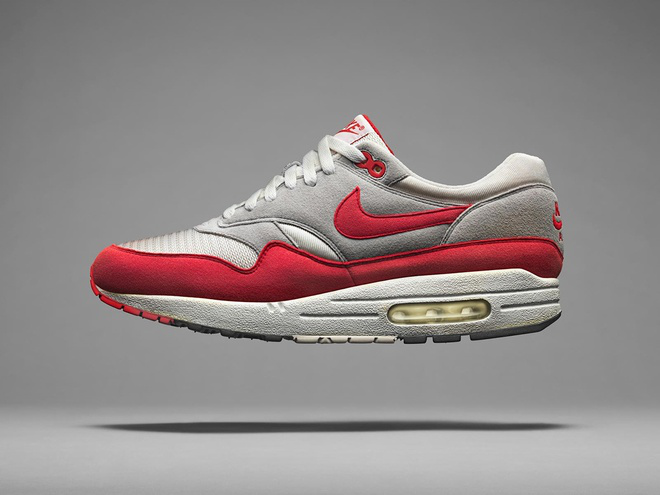

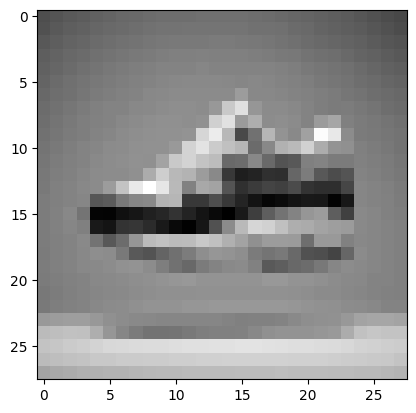

1/1 [==============================] - 0s 48ms/step


array([8])

In [35]:
from keras.utils import load_img
from keras.utils import img_to_array
import numpy as np
from keras.models import load_model


#Load model
model = load_model('fashion_mnist.h5')

#Open image uploaded 
img = Image.open('nike_air_max_1.jpg')

#Display image uploaded
display(img)

#Convert to gray Image
img = img.convert('L')

#Resize to 28x28 image
img = img.resize((28,28))
plt.imshow(img, cmap= 'gray', interpolation= 'none')
plt.show()
img = img_to_array(img)
img = img.reshape(1,28*28)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img), axis = -1)